# Preliminary Spectrum Analysis
This notebook aims to use **SVD** (Singular Value Decomposition, a method introduced in primary linear algebra and utilized in this paper), **PCA** (Principal Component Analysis, nearly one of the most classical unsupervised machine learning method), **NMD** (non-Negative Matrix Factorization, the algorithm I think fits the problem most which is not introduced in undergraduate mathematics nor this paper, developed based on PCA) to analyze the time-resolved spectrum preliminarily.

We use preliminary spectrum analysis to judge how many components are there in this system, and hopefully we could roughly judge the shape of the UV-Vis spectrum of each component
## package import and data read-in

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import *
import numpy as np
from sklearn.decomposition import PCA

In [16]:
## Read the Glucose Dataset
# worksheet = pd.read_csv("Sucrose.csv",sep=" ")
# worksheet = pd.read_csv("Fructose.csv",sep=" ")
worksheet = pd.read_csv("Glucose.csv",sep=" ")
worksheet.head()

,0,-10,-9.34000559151173,-9.00800175964832,-8.34299832582474,-8.00999872386456,-7.34399951994419,-7.01099991798401,-6.34700231254101,-6.01299688220024,...,218.587997704744,218.921993076801,219.586996510625,219.919996112585,220.584999546409,220.917999148369,221.583998352289,221.916002184153,222.582001388073,222.915000990033
0,354.898163,0.298247,0.302309,0.302509,0.300623,0.298233,0.304615,0.303335,0.297575,0.305442,...,0.866205,0.852310,0.861435,0.849400,0.880423,0.866084,0.857744,0.871868,0.876135,0.869435
1,355.268555,0.297271,0.299730,0.303309,0.297357,0.296748,0.303485,0.301978,0.298139,0.305012,...,0.858489,0.849133,0.854038,0.848960,0.876055,0.858740,0.851978,0.869753,0.887856,0.852345
2,355.638916,0.294634,0.295024,0.295342,0.295044,0.293781,0.298797,0.298406,0.295902,0.299572,...,0.855001,0.843744,0.853543,0.845538,0.867011,0.845110,0.842277,0.867378,0.871577,0.852323
3,356.009247,0.291486,0.292841,0.290825,0.291649,0.290553,0.294507,0.295423,0.294202,0.296827,...,0.847184,0.843365,0.859525,0.843630,0.866209,0.843996,0.844239,0.856819,0.867586,0.847842
4,356.379547,0.291430,0.293327,0.287490,0.291875,0.289909,0.291317,0.295236,0.294305,0.296566,...,0.841722,0.845831,0.849605,0.844217,0.852105,0.840150,0.836671,0.845310,0.856377,0.838354


In [17]:
X = worksheet.iloc[:,1:]
X.shape #(wave length,time point)

(1126, 467)

In [18]:
Y = X.T # wave length as features(column), time as sample number
Ynorm = np.abs(Y)
Y.shape

(467, 1126)

## Analyze
### 1. SVD

In [19]:
# wl: wave lengths
wl = worksheet.iloc[:,0]

In [20]:
# Apply singular value decomposition (SVD)
[u,s,vh] = np.linalg.svd(Ynorm)

Text(0, 0.5, 'log(singular value)')

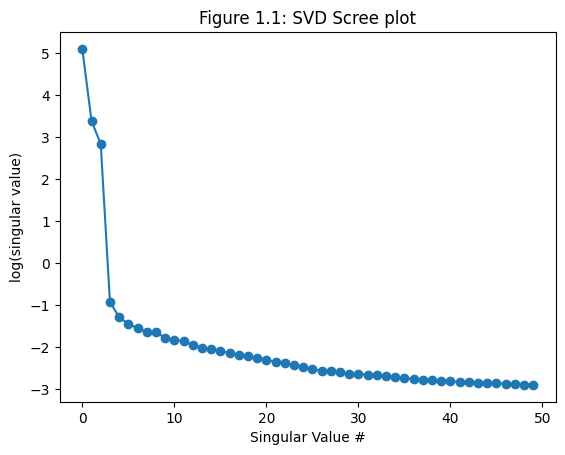

In [21]:
# making Scree plot
plt.scatter(list(range(50)),np.log(s[:50]))
plt.plot(list(range(50)),np.log(s[:50]))
plt.title("Figure 1.1: SVD Scree plot")
plt.xlabel("Singular Value #")
plt.ylabel("log(singular value)")


Text(0, 0.5, 'Contribution')

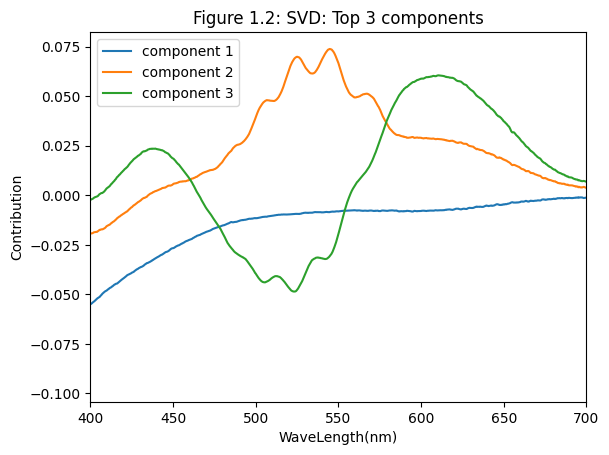

In [22]:
comp1,comp2,comp3 = vh[0:3,:]

plt.plot(wl,comp1)
plt.plot(wl,comp2)
plt.plot(wl,comp3)
plt.xlim([400,700])
plt.legend(["component 1","component 2","component 3"])
plt.title("Figure 1.2: SVD: Top 3 components")
plt.xlabel("WaveLength(nm)")
plt.ylabel("Contribution")

### 2. PCA

In [23]:
# Apply principal component analysis (PCA)
pca_Y = PCA(n_components=50)
pca_Y.fit(Ynorm)
pca_Y.singular_values_

array([46.63984244, 19.32430371,  1.90841234,  0.32153555,  0.23818042,
        0.22634007,  0.19342359,  0.19161042,  0.17351482,  0.16087983,
        0.15539605,  0.14363871,  0.14206331,  0.13036281,  0.12853626,
        0.12265182,  0.11615197,  0.11012138,  0.10339066,  0.09908842,
        0.09641024,  0.09408737,  0.08828427,  0.08372417,  0.08216228,
        0.07716226,  0.07571397,  0.07410508,  0.07194259,  0.07089713,
        0.07021038,  0.06890898,  0.06778412,  0.06585981,  0.06403058,
        0.06343291,  0.061608  ,  0.06075518,  0.06050451,  0.05988892,
        0.05892528,  0.0582171 ,  0.0575865 ,  0.05628516,  0.0561906 ,
        0.05595103,  0.05535908,  0.05491168,  0.05424721,  0.05362356])

Text(0, 0.5, 'log(singular value)')

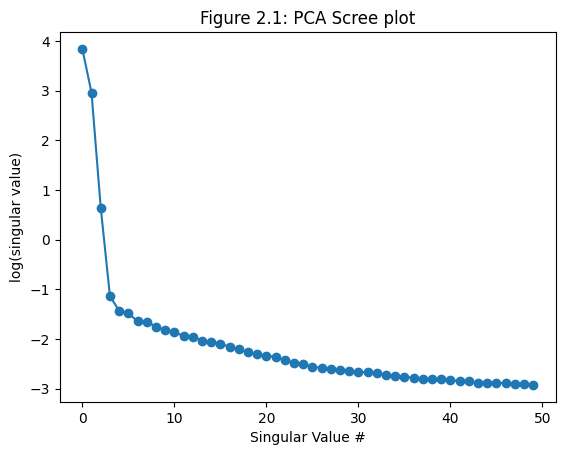

In [24]:
x_lis = list(range(50))
plt.scatter(x_lis,np.log(pca_Y.singular_values_))
plt.plot(x_lis,np.log(pca_Y.singular_values_))
plt.title("Figure 2.1: PCA Scree plot")
plt.xlabel("Singular Value #")
plt.ylabel("log(singular value)")


Text(0, 0.5, 'Contribution')

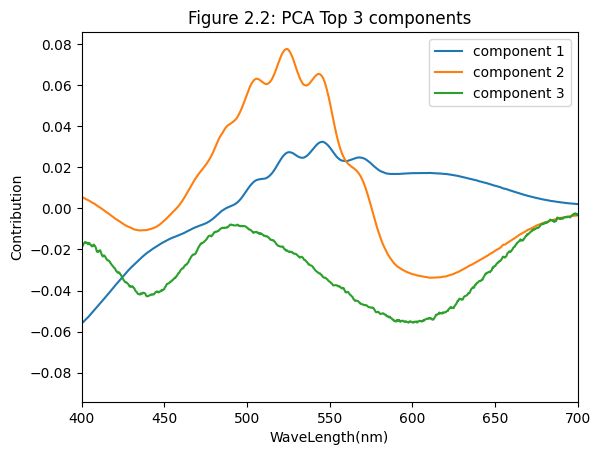

In [25]:
comp1,comp2,comp3 = pca_Y.components_[0:3]
plt.plot(wl,comp1)
plt.plot(wl,comp2)
plt.plot(wl,comp3)
plt.xlim([400,700])
plt.legend(["component 1","component 2","component 3"])
plt.title("Figure 2.2: PCA Top 3 components")
plt.xlabel("WaveLength(nm)")
plt.ylabel("Contribution")


### 3. NMF

In [26]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=3, init='random', random_state=22)
nmf.fit(Ynorm)

NMF(init='random', n_components=3, random_state=22)

In [27]:
nmf.components_

array([[2.11231963e+00, 2.09853125e+00, 2.07595824e+00, ...,
        1.64248556e-03, 1.21377567e-03, 5.31134822e-03],
       [2.02925507e-01, 2.01724436e-01, 1.98468874e-01, ...,
        2.46665154e-03, 1.58339161e-03, 9.70827619e-04],
       [4.46701099e-01, 4.45172267e-01, 4.40994536e-01, ...,
        5.51592267e-03, 4.04489572e-03, 7.83898894e-04]])

(-0.02, 1.0)

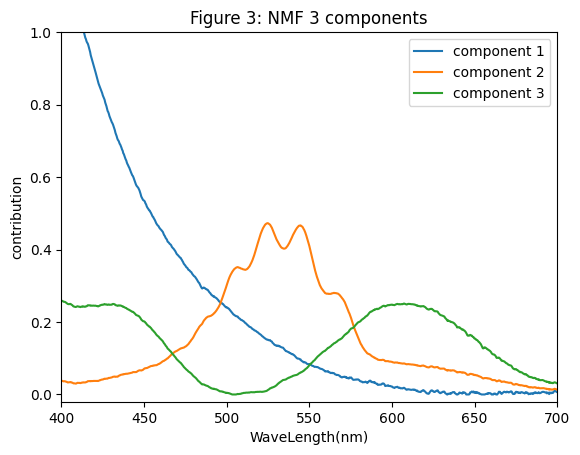

In [28]:
comp1,comp2,comp3 = np.abs(nmf.components_[0:3])
# comp1,comp2,comp3,comp4 = np.abs(nmf.components_[0:4])
plt.plot(wl,comp1)
plt.plot(wl,comp2)
plt.plot(wl,comp3)
# plt.plot(wl,comp4)
plt.xlim([400,700])
plt.legend(["component 1","component 2","component 3"])
# plt.legend(["component 1","component 2","component 3","component 4"])
plt.title("Figure 3: NMF 3 components")
plt.xlabel("WaveLength(nm)")
plt.ylabel("contribution")
plt.ylim([-0.02,1])